# Exercise 1

## Exercise 1.1

write a code that prints the following pattern. Try to use as few loops as possible.

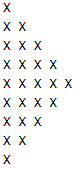

Avoid using trivial solutions like:

print('X') 

print('X X')

print('X X X')

.....

print('X X X')

print('X X')

print('X')


In [13]:
printString = "X "
pyramidHeight = 5

for i in range(pyramidHeight*2 - 1):
    print(printString * (pyramidHeight - abs(pyramidHeight - i - 1)))
    

X 
X X 
X X X 
X X X X 
X X X X X 
X X X X 
X X X 
X X 
X 


## Exercise 1.2

Write a script that will sum all numbers in the following string. You can split each number into single digits, so for example, you can consider 45 to be 4 and 5

In [32]:
import re
input_str = "n45as29@#8ss6"

numbers = re.findall(r'\d', input_str)

int_array = [int(num) for num in numbers]
  
result = sum(int_array)

print(result)

34


## Exercise 1.3

Write a script that will convert an arbitrary integer to a binary number (the number will be represented as a string with only *0* and *1*). Avoid using the *bin()* function or any other pythons default functions

In [49]:
import math

def getBinValue(intVar):
  output = "0b"
  for i in range(math.ceil(math.sqrt(intVar))):
    output += str((intVar >> (math.ceil(math.sqrt(intVar)) - 1 - i)) & 1)
  return output

# 0b0110
getBinValue(11)

'0b1011'

## Exercise 1.4 - The Fibonacci Sequence:

The Fibonacci Sequence is a series of numbers. The following number is found by adding up the two numbers before it. The first two numbers are 0 and 1. For example, 0, 1, 1, 2, 3, 5, 8, 13. The following number in this series above is 8 + 13 = 21


Your task is to implement a function *fibonacci* that takes an integer as an input and returns a list that contains all Fibonacci numbers with values lower than the input integer

Example:

*print(fibonaci(10))*

[0, 1, 1, 2, 3, 5, 8]


In [50]:
def fibonacci(upper_threshold: int) -> list:
    fibonacciList = [0, 1]
    while True:
        if (fibonacciList[-1] + fibonacciList[-2]) > upper_threshold:
            break
        fibonacciList.append(fibonacciList[-1] + fibonacciList[-2])
    return fibonacciList

print(fibonacci(10))

[0, 1, 1, 2, 3, 5, 8]


#### Advanced

Try to implement the function using multiple approaches: *Iterative approach*, *Recusrion*, *Memoization*

## Exercise 1.5. -  Rock, Paper, Scissors game:

#### basic

*Rock, Paper, Scissors* is a well-known and straightforward game. If you do not know the rules, google them. We will write a code for the Rock, Paper, Scissors game where the user plays against a random computer. The code can be written into one function *rock_paper_scissors*.

Notes:
- This implementation uses the **random** library to enable the computer to make a random choice.
- Keyword **Input** may be helpful. Check it
- After the function is run, the program will ask you about your movement, which you type in
- The game is case-insensitive for user input (e.g., "rock", "Rock", and "ROCK" are all valid).
- This script plays one round of the game.
- The script prints the result ('You lose', 'You win', 'It is a tie')


In [73]:
import random

def rock_paper_scissors() -> None:
    print("Let's play Rock, Paper, Scissors!")
    print('I am empty')
    userChoice = input("Choose rock, paper, or scissors: ").capitalize()
    computerChoice = random.choice(['rock', 'paper', 'scissors']).capitalize()

    print(f"You chose: {userChoice}")
    print(f"Computer chose: {computerChoice}")
    
    truthTable = {
        ('Rock', 'Scissors'):   'You win!',
        ('Scissors', 'Paper'):  'You win!',
        ('Paper', 'Rock'):      'You win!',
        ('Scissors', 'Rock'):   'You lose!',
        ('Paper', 'Scissors'):  'You lose!',
        ('Rock', 'Paper'):      'You lose!'
    }

    if (userChoice, computerChoice) in truthTable:
        print(truthTable[(userChoice, computerChoice)])
    else:
        print("It's a tie!")

rock_paper_scissors()

Let's play Rock, Paper, Scissors!
I am empty
You chose: Rock
Computer chose: Paper
Computer wins!


#### Advanced

Extend the Rock, Paper, Scissors game to be able to play *n* rounds. 

Notes: 
- The scrips will contain two counters - user score and computer score
- After each run, the script prints the current scores and rounds.
- When the number of rounds is reached, the script prints the result ('You lose', 'You win', 'It is a tie')

# Exercise 2

The purpose of this excercise is to practise working with NumPy library

## Exercise 2.1


In this exercise, you will work with NumPy arrays and learn how to efficiently modify and process them using both loops and vectorized operations. Your task is to:

1. Implement the function *create_array_nxn* that generates an n×n NumPy array filled with numbers from n² - 1 down to 0
2. Using a loop-based approach (for-loop, while-loop), implement the function *apply_threshold_loop* that takes any NumPy array and replaces all numbers below a user-defined threshold with 0.
3. Implement function *apply_threshold_vectorized* that performs the same operation as *apply_threshold_loop*, but without loops, using NumPy vectorized operations
4. Implement function *compare_performance* that compares the execution time of functions *apply_threshold_vectorized* and *apply_threshold_loop* with **time** library and print the results


**Additional Notes**:

- Ensure n is a positive integer (n > 0).
- Use the time library to measure execution times for performance comparison.
- The function *compare_performance(n, threshold)* should:
    - Generate an n×n array.
    - Apply both loop-based and vectorized thresholding.
    - Print execution times.

In [75]:
import numpy as np
import time

In [88]:
def create_array_nxn(n: int) -> np.ndarray:
    array = np.arange(n * n).reshape(n, n)
    #print(array)
    return array

In [94]:
def apply_threshold_loop(arr: np.ndarray, threshold: int) -> np.ndarray:
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if arr[i, j] < threshold:
                arr[i, j] = 0
    pass
    

In [95]:
def apply_threshold_vectorized(arr: np.ndarray, threshold: int) -> np.ndarray:
    arr = np.where(arr < threshold, 0, arr)
    pass
    

In [96]:
def compare_performance(n: int, threshold: int) -> None:
    if n <= 0:
        print("n must be a positive integer.")
        return
    
    arr = create_array_nxn(n)
    
    start_loop = time.time()
    apply_threshold_loop(arr.copy(), threshold)
    end_loop = time.time() 
    
    start_vec = time.time()
    apply_threshold_vectorized(arr.copy(), threshold)
    end_vec = time.time() 
    
    print(f"Loop-based execution time: {end_loop - start_loop:.6f} seconds")
    print(f"Vectorized execution time: {end_vec - start_vec:.6f} seconds")

compare_performance(1000, 64)

Loop-based execution time: 0.369237 seconds
Vectorized execution time: 0.007547 seconds


## Exercise 2.2 - Digi display

#### basic

The task will be to create a simulation of a Digi display that will be able to display an arbitrary integer
   
*hint: to show the image, use the library matplotlib.pyplot. Also, you may find function *np.concatenate* helpful

In [103]:
def show_in_digi(input_integer: int) -> None:
    pass

In [110]:
import matplotlib.pyplot as plt
import re
import math

show_in_digi(5289) will show:


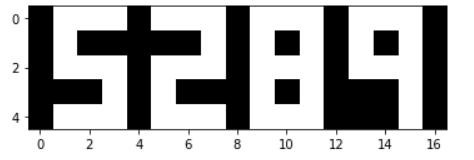

*hint2: you may find the following dict usefull*

In [153]:
numbs = {
      "1": np.array([[0, 1, 1], [1, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 1
      "2": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [1, 0, 0], [1, 1, 1]]), # 2
      "3": np.array([[1, 1, 1], [0, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 3
      "4": np.array([[1, 0, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [0, 0, 1]]), # 4
      "5": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 5
      "6": np.array([[1, 1, 1], [1, 0, 0], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 6
      "7": np.array([[1, 1, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]), # 7
      "8": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [1, 0, 1], [1, 1, 1]]), # 8
      "9": np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1], [0, 0, 1], [1, 1, 1]]), # 9
      "0": np.array([[1, 1, 1], [1, 0, 1], [1, 0, 1], [1, 0, 1], [1, 1, 1]]), # 0
      ".": np.array([[0], [0], [0], [0], [1]]), # dot
      "-": np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1], [0, 0, 0], [0, 0, 0]]) # minus
  }

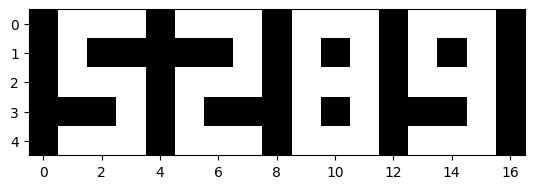

In [148]:
def show_in_digi(input_integer: int) -> None:
    intLen = math.ceil(math.log10(input_integer))
    
    outputarr = np.zeros((5, 1))
    
    for i in range(intLen):
        outputarr = np.concatenate((outputarr, numbs[str(input_integer)[i]]), axis=1)
        outputarr = np.concatenate((outputarr, np.zeros((5, 1))), axis=1)

    
    fig, ax = plt.subplots()
    ax.imshow(outputarr, cmap='gray')
    plt.show()

    pass



show_in_digi(5289)

#### advanced

Extend your *show_in_digi* function to be able to display an arbitary float number and negative numbers

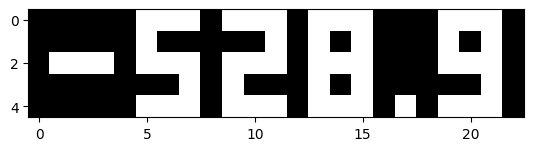

In [154]:
def show_in_digi_extended(input_number: float) -> None:
    outputarr = np.zeros((5, 1))
    
    for char in str(input_number):
        if char in numbs:
            outputarr = np.concatenate((outputarr, numbs[char]), axis=1)
            outputarr = np.concatenate((outputarr, np.zeros((5, 1))), axis=1)
        else:
            print(f"Character '{char}' is not supported.")
    
    fig, ax = plt.subplots()
    ax.imshow(outputarr, cmap='gray')
    plt.show()

show_in_digi_extended(-528.9)


# Exercise 3 - Playing with California Housing Dataset

The purpose of this exercise is to learn basic operations of **pandas** library. Use *california_housing_dataset* you can find in google colab to do following operations:

- check what *dataset.describe()* does

- display all rows where *total_bedrooms* column is bigger than 310

- drop also first and last row

- save a mean of values in *households* columns to variable, using *matplotlib* display number of households in the graph (x-axis would be ID, y-axis - numbers of households) as dots with the same color, display also mean as a single line in the graph with different color as dots is

 - check if any of the columns contain NaN values, if yes, replace the NaN values with the arithmetic mean of the whole dataset 

 - display *lat* and *long* into plot, *lat* would be on *x* axis and *long* on *y* axis 

- choose two arbitrary columns and normalize all values inside using *min-max normalization*:

- Create a Correlation Matrix from all columns 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the dataset from Colab's sample_data folder
print("--- Loading Dataset ---")
dataset = pd.read_csv('sample_data/california_housing_train.csv')

# 2. Check what dataset.describe() does
print("\n--- Dataset Description ---")
description = dataset.describe()
print(description)

# 3. Display all rows where total_bedrooms column is bigger than 310
print("\n--- Rows with total_bedrooms > 310 ---")
filtered_bedrooms = dataset[dataset['total_bedrooms'] > 310]
print(filtered_bedrooms.head()) # Using .head() just to keep the console output clean

# 4. Drop the first and last row
dataset = dataset.iloc[1:-1]
print(f"\n--- Dropped first and last row. New shape: {dataset.shape} ---")

# 5. Plot the number of households and their mean
households_mean = dataset['households'].mean()

plt.figure(figsize=(10, 6))
# Plot households as dots (scatter plot)
plt.scatter(dataset.index, dataset['households'], color='blue', alpha=0.5, label='Households', s=10)
# Display mean as a single horizontal line
plt.axhline(y=households_mean, color='red', linestyle='-', linewidth=2, label=f'Mean: {households_mean:.2f}')

plt.title('Number of Households per ID')
plt.xlabel('ID (Index)')
plt.ylabel('Number of Households')
plt.legend()
plt.show()

# 6. Check for NaN values and replace with the arithmetic mean
print("\n--- Handling NaN Values ---")
has_nans = dataset.isna().any().any()
print(f"Contains NaN values? {has_nans}")

if has_nans:
    # Fill NaNs with the mean of each respective column
    dataset = dataset.fillna(dataset.mean())
    print("NaN values have been replaced with the column means.")

# 7. Display lat and long into plot (lat on x-axis, long on y-axis)
plt.figure(figsize=(8, 6))
plt.scatter(dataset['latitude'], dataset['longitude'], color='green', alpha=0.4, s=5)
plt.title('Geographical Distribution (Latitude vs Longitude)')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# 8. Normalize two arbitrary columns using min-max normalization
print("\n--- Min-Max Normalization ---")
cols_to_normalize = ['total_rooms', 'population']

for col in cols_to_normalize:
    col_min = dataset[col].min()
    col_max = dataset[col].max()
    dataset[col] = (dataset[col] - col_min) / (col_max - col_min)

print("Normalized 'total_rooms' and 'population':")
print(dataset[['total_rooms', 'population']].head())

# 9. Create a Correlation Matrix from all columns
print("\n--- Correlation Matrix ---")
correlation_matrix = dataset.corr()
print(correlation_matrix)

ModuleNotFoundError: No module named 'sklearn'